# HW8_Assignment2

## Set up the work for data-driven inference based on CitiBike data

In [1]:
from __future__  import print_function, division
import pylab as pl
import pandas as pd
import numpy as np
import os

%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Idea：

Subscribers are more likely than customers to choose biking for commuting on weekend.

## Null Hypothesis:

The proportion of subscribers biking on weekends is the same or higher than the proportion of customers biking on weekends.  
  
## _$H_0$_: $\frac{S_{\mathrm{weekend}}}{S_{\mathrm{total}}} >= \frac{C_{\mathrm{weekend}}}{C_{\mathrm{total}}}$

## Alternative Hypothesis

The proportion of subscribers biking on weekends is less than the proportion of customers biking on weekends.  
  
## _$H_1$_ : $\frac{S_{\mathrm{weekend}}}{S_{\mathrm{total}}} < \frac{C_{\mathrm{weekend}}}{C_{\mathrm{total}}}$

## significance level  $\alpha=0.05$

### reading data from citibike csv file from Feb 2015

In [2]:
 def getCitiBikeCSV(datestring):
    print ("Downloading", datestring)
    ### First I will heck that it is not already there
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        if os.path.isfile(datestring + "-citibike-tripdata.csv"):
            # if in the current dir just move it
            if os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA")):
                print ("Error moving file!, Please check!")
        #otherwise start looking for the zip file
        else:
            if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip"):
                if not os.path.isfile(datestring + "-citibike-tripdata.zip"):
                    os.system("curl -O https://s3.amazonaws.com/tripdata/" + datestring + "-citibike-tripdata.zip")
                ###  To move it I use the os.system() functions to run bash commands with arguments
                os.system("mv " + datestring + "-citibike-tripdata.zip " + os.getenv("PUIDATA"))
            ### unzip the csv 
            os.system("unzip " + os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip")
            ## NOTE: old csv citibike data had a different name structure. 
            if '2014' in datestring:
                os.system("mv " + datestring[:4] + '-' +  datestring[4:] + 
                          "\ -\ Citi\ Bike\ trip\ data.csv " + datestring + "-citibike-tripdata.csv")
            os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA"))
    ### One final check:
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        print ("WARNING!!! something is wrong: the file is not there!")

    else:
        print ("file in place, you can continue")

In [3]:
datestring = '201502'
getCitiBikeCSV(datestring)

file in place, you can continue


In [4]:
df = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring + '-citibike-tripdata.csv')
# df is the dataframe where the content of the csv file is stored
df['date'] = pd.to_datetime(df['starttime'])
# note that with dataframes I can refer to variables as dictionary keys, 
# i.e. df['starttime'] or as attributes: df.starttime. 
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date
0,801,2/1/2015 0:00,2/1/2015 0:14,521,8 Ave & W 31 St,40.750450,-73.994811,423,W 54 St & 9 Ave,40.765849,-73.986905,17131,Subscriber,1978.0,2,2015-02-01 00:00:00
1,379,2/1/2015 0:00,2/1/2015 0:07,497,E 17 St & Broadway,40.737050,-73.990093,504,1 Ave & E 15 St,40.732219,-73.981656,21289,Subscriber,1993.0,1,2015-02-01 00:00:00
2,2474,2/1/2015 0:01,2/1/2015 0:42,281,Grand Army Plaza & Central Park S,40.764397,-73.973715,127,Barrow St & Hudson St,40.731724,-74.006744,18903,Subscriber,1969.0,2,2015-02-01 00:01:00
3,818,2/1/2015 0:01,2/1/2015 0:15,2004,6 Ave & Broome St,40.724399,-74.004704,505,6 Ave & W 33 St,40.749013,-73.988484,21044,Subscriber,1985.0,2,2015-02-01 00:01:00
4,544,2/1/2015 0:01,2/1/2015 0:10,323,Lawrence St & Willoughby St,40.692362,-73.986317,83,Atlantic Ave & Fort Greene Pl,40.683826,-73.976323,19868,Subscriber,1957.0,1,2015-02-01 00:01:00


In [5]:
# to get column names
df.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender', 'date'],
      dtype='object')

In [6]:
df.drop(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'gender',
       'birth year'], axis=1, inplace=True)

In [7]:
df.head()

,usertype,date
0,Subscriber,2015-02-01 00:00:00
1,Subscriber,2015-02-01 00:00:00
2,Subscriber,2015-02-01 00:01:00
3,Subscriber,2015-02-01 00:01:00
4,Subscriber,2015-02-01 00:01:00


## plot the number of trips per week day

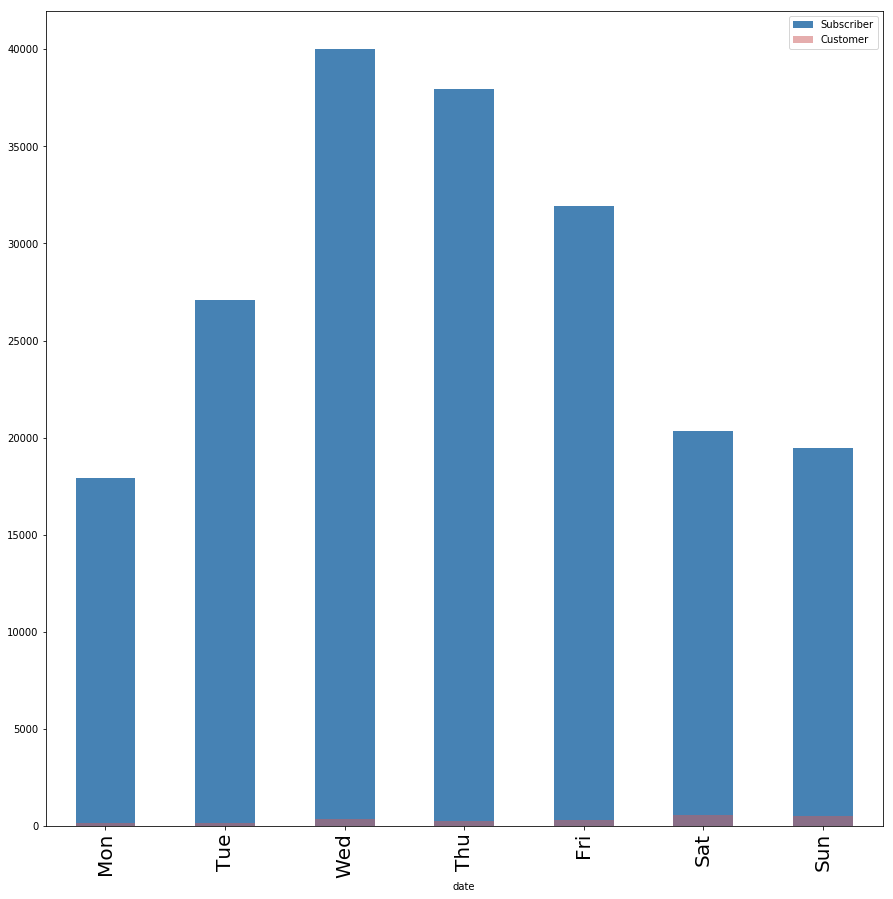

In [8]:
fig = pl.figure(figsize(15,15))

#instad of plotting with matplotlib i.e. plot() i use the plot method in pandas
norm_w = 1
((df['date'][df['usertype'] == 'Subscriber'].groupby([df['date'].dt.weekday]).count()) / norm_w).plot(kind="bar", 
                                                                                         color='SteelBlue', 
                                                                                         label='Subscriber')

norm_m = 1
ax = ((df['date'][df['usertype'] == 'Customer'].groupby([df['date'].dt.weekday]).count()) / norm_m).plot(kind="bar", 
                                                                                              color='IndianRed', 
                                                                                              alpha=0.5,
                                                                                              label='Customer')

tmp = ax.xaxis.set_ticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], fontsize=20)
pl.legend()

## Figure 1a: Distribution of Citibike bikers by usertype in February 2015, absolute counts

### Note: the counts have errors of course. what is the error on the count statistics? 
### for N counts the error is sqrt(N) - this is because counts follow a Poisson statistic

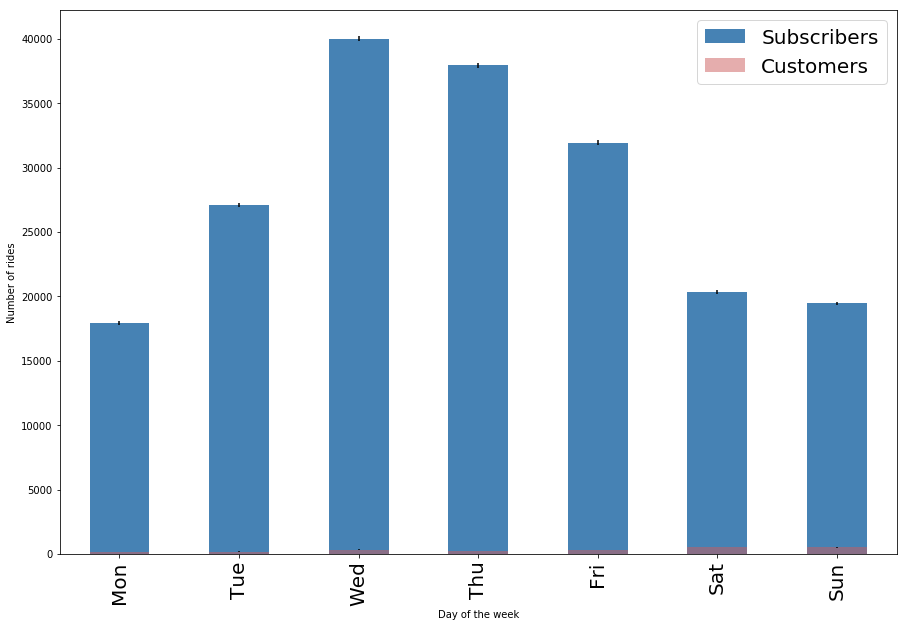

In [9]:
fig=pl.figure(figsize(15,10))

counts_s = df.date[df.usertype == 'Subscriber'].groupby([df.date.dt.weekday]).count()
norm_s = 1
error_s = np.sqrt(counts_s)
ax=((counts_s) / norm_s).plot(kind="bar",color='SteelBlue',  yerr=[
            ((error_s) / norm_s, (error_s) / norm_s)], label='Subscriber')


counts_c = df.date[df.usertype=='Customer'].groupby([df.date.dt.weekday]).count()
norm_c = 1
error_c=np.sqrt(counts_c)
((counts_c) / norm_c).plot(kind="bar", alpha=0.5, yerr=[((error_c) / norm_c, (error_c) / norm_c)], 
                           color='IndianRed', label='Customers')
ax.xaxis.set_ticklabels(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'], fontsize=20)
ax.set_ylabel ("Number of rides")
ax.set_xlabel ("Day of the week")
pl.legend(['Subscribers','Customers'],fontsize=20)



## Figure 1b: Distribution of Citibike bikers by usertype in February 2015, absolute counts, with statistical errors

_normalize_ the distribution of subscribers, and that of customers, i.e. devide them by the total number of rides for that usertype. 

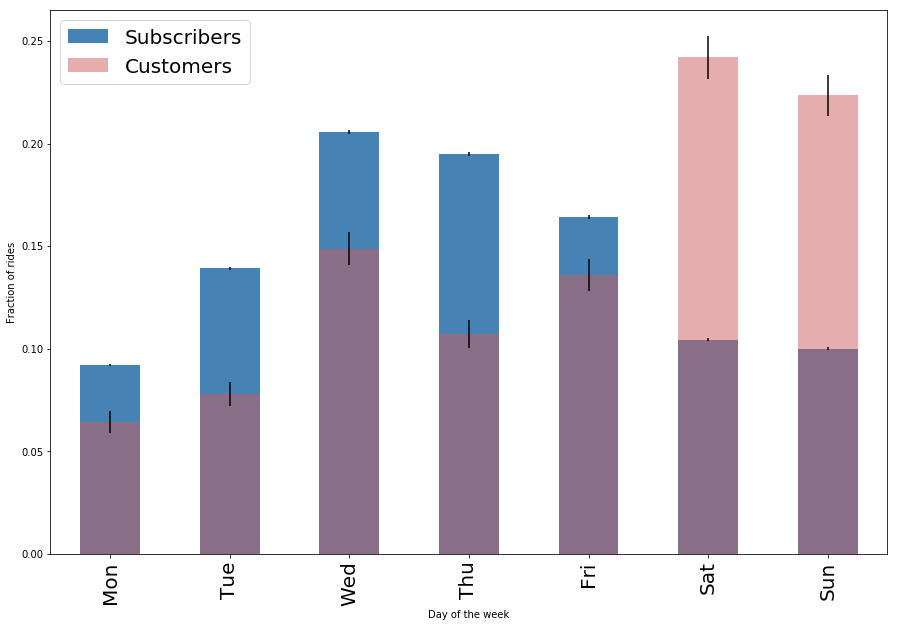

In [10]:
fig = pl.figure(figsize(15,10))

norm_s = counts_s.sum()
error_s = np.sqrt(counts_s)
((counts_s) / norm_s).plot(kind="bar", color='SteelBlue',  
                           yerr=[((error_s) / norm_s, (error_s) / norm_s)], 
                           label='Subscirbers')

norm_c = counts_c.sum()
ax = ((counts_c) / norm_c).plot(kind="bar", alpha=0.5, 
                                yerr=[((error_c) / norm_c, (error_c) / norm_c)], 
                                color='IndianRed', label='Customer')

ax.xaxis.set_ticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], fontsize=20)
ax.set_ylabel ("Fraction of rides")
ax.set_xlabel ("Day of the week")

pl.legend(['Subscribers','Customers'],fontsize=20)



## Figure 2: Distribution of Citibike bikers by usertype in February 2015, normalized

# Set up the test of proportions

## I need the fraction of subscribers that bikes during the weekdays and the fraction that bikes during weekends, and the same for customers

Subscirbers: week:0.796, weekend:0.204, weekend error:0.002, weekend error:0.001
Customers: week:0.535, weekend:0.465, weekend error:0.015, weekend error:0.014


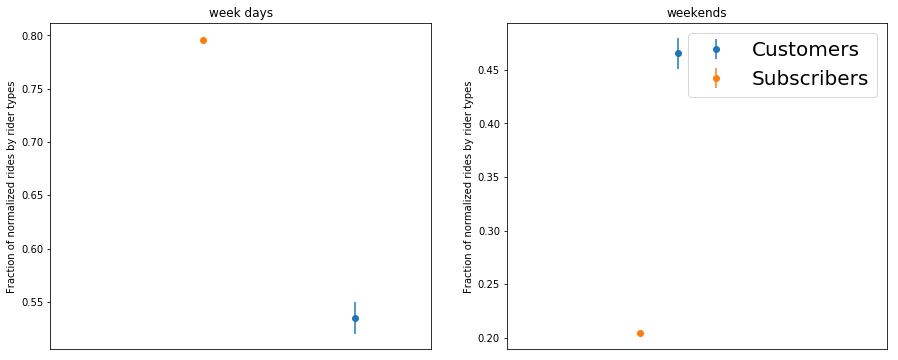

In [11]:
fig = pl.figure(figsize(15,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.set_xticks([])
ax2.set_xticks([])

week_s = sum(counts_s[:-2]) * 1.0 / norm_s  #fraction of subscriber riding on week days
weekend_s = sum(counts_s[-2:]) * 1.0 / norm_s  #fraction of subscriber riding on weekends
eweek_s = np.sqrt(sum(error_s[:-2]**2)) / norm_s  #error on fraction number of subscriber riding on week days
eweekend_s = np.sqrt(sum(error_s[-2:]**2)) / norm_s #error on fraction number of subscriber riding on weekends

#same nomenclature as above
week_c = sum(counts_c[:-2]) * 1.0 / norm_c
weekend_c = sum(counts_c[-2:]) * 1.0 / norm_c
eweek_c = np.sqrt(sum(error_c[:-2]**2)) / norm_c
eweekend_c = np.sqrt(sum(error_c[-2:]**2)) / norm_c

print("Subscirbers: week:{0:.3f}, weekend:{1:.3f}, weekend error:{2:.3f}, weekend error:{3:.3f}"\
      .format(week_s, weekend_s, eweek_s, eweekend_s))
print("Customers: week:{0:.3f}, weekend:{1:.3f}, weekend error:{2:.3f}, weekend error:{3:.3f}"\
      .format(week_c, weekend_c, eweek_c, eweekend_c))

ax1.errorbar([0.4], [week_c], yerr=[eweek_c], fmt='o', label='Customers')
ax1.errorbar([0.2], [week_s], yerr=[eweek_s], fmt='o', label='Subscribers')
ax1.set_xlim(0, 0.5)
ax2.errorbar([0.4], [weekend_c], yerr=[eweekend_c], fmt='o', label='Customers')
ax2.errorbar([0.2], [weekend_s], yerr=[eweekend_s], fmt='o', label='Subscribers')
ax1.set_xlim(0, 0.5)
ax1.set_title("week days")
ax2.set_title("weekends")
ax2.set_ylabel("Fraction of normalized rides by rider types")
ax1.set_ylabel("Fraction of normalized rides by rider types")

pl.xlim(-0.5, 1.5)
pl.legend(fontsize = 20)

## Figure 3: Fraction of Citibike bikers per rider type in February 2015 for week days (left) and weekends (right)

### Is the percentage of customers that ride on weekends lower or equal to that of subscribers?


## The Statistics are:

### $ z =\frac{(p_0 - p_1)}{SE}$


### $ p = \frac{p_0n_0 + p_1n_1}{n_0+n_1}$

### $ SE =\sqrt{p(1-p)(\frac{1}{n_0}+\frac{1}{n_1})}$

## and in this notation

### $ p_0 =\frac{S_{\mathrm{weekend}}}{S_ {\mathrm{total}}}$

## and

### $ p_1 =\frac{C_{\mathrm{weekend}}}{C_ {\mathrm{total}}}$

In [12]:
P0mP1 = weekend_s - weekend_c
print ("difference between subscriber and customer on weekend: ", P0mP1)
if P0mP1 > 0:
    # we are done...
    print("In accordance with Null Hypothesis")
else:
    # morework to do
    print ("We must check the significance before we reject the Null Hypothesis")

difference between subscriber and customer on weekend:  -0.260975687615
We must check the significance before we reject the Null Hypothesis


### Is this difference statistically significant?

In [13]:
# defining the functions that calculate the statistics
# the lambda style definition is NOT APPROVED BY PEP8 and you should avoind it
# but I am putting it here since you may encounter it in your coding life.
# confront the equation in the markdown cell above with these function to understand as they work

p = lambda p0, p1, n0, n1: (p0 * n0 + p1 * n1) / (n0 + n1)
se = lambda p, n0, n1: np.sqrt(p * (1 - p) * (1.0 / n0 + 1.0 / n1)) #standard error
zscore = lambda p0, p1, s : (p0 - p1) / s

# calculations

sp_stdev_sc = se(p(weekend_s, weekend_c, norm_s, norm_c), norm_s, norm_c)
# print (sp_stdev_mw)
z = zscore(weekend_s, weekend_c, sp_stdev_sc)
print ("The z statistics is %.2f"%z) 

The z statistics is -30.46


## The smallest number reported in  z stats tables is (thpically) -3, which gives  a p value
## $p <0.0002$, which is smaller than my chosen $\alpha=0.05$ - so yes, it is statistically significant.
## We reject the Null Hypothesis.

-

# Check the robustness of the answer

Lets see if our test holds in the summer, when people clothes may get less in the way to riding


In [14]:
datestring = '201507'
getCitiBikeCSV(datestring)

file in place, you can continue


In [15]:
df_07 = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring + '-citibike-tripdata.csv')
df_07['date'] = pd.to_datetime(df_07.starttime)
df_07.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date
0,732,7/1/2015 00:00:03,7/1/2015 00:12:16,489,10 Ave & W 28 St,40.750664,-74.001768,368,Carmine St & 6 Ave,40.730386,-74.002150,18669,Subscriber,1970.0,1,2015-07-01 00:00:03
1,322,7/1/2015 00:00:06,7/1/2015 00:05:29,304,Broadway & Battery Pl,40.704633,-74.013617,3002,South End Ave & Liberty St,40.711512,-74.015756,14618,Subscriber,1984.0,1,2015-07-01 00:00:06
2,790,7/1/2015 00:00:17,7/1/2015 00:13:28,447,8 Ave & W 52 St,40.763707,-73.985162,358,Christopher St & Greenwich St,40.732916,-74.007114,18801,Subscriber,1992.0,1,2015-07-01 00:00:17
3,1228,7/1/2015 00:00:23,7/1/2015 00:20:51,490,8 Ave & W 33 St,40.751551,-73.993934,250,Lafayette St & Jersey St,40.724561,-73.995653,19137,Subscriber,1990.0,1,2015-07-01 00:00:23
4,1383,7/1/2015 00:00:44,7/1/2015 00:23:48,327,Vesey Pl & River Terrace,40.715338,-74.016584,72,W 52 St & 11 Ave,40.767272,-73.993929,15808,Subscriber,1988.0,1,2015-07-01 00:00:44


In [16]:
df_07.drop(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'gender',
       'birth year'], axis=1, inplace=True)

In [17]:
df_07.head()

,usertype,date
0,Subscriber,2015-07-01 00:00:03
1,Subscriber,2015-07-01 00:00:06
2,Subscriber,2015-07-01 00:00:17
3,Subscriber,2015-07-01 00:00:23
4,Subscriber,2015-07-01 00:00:44


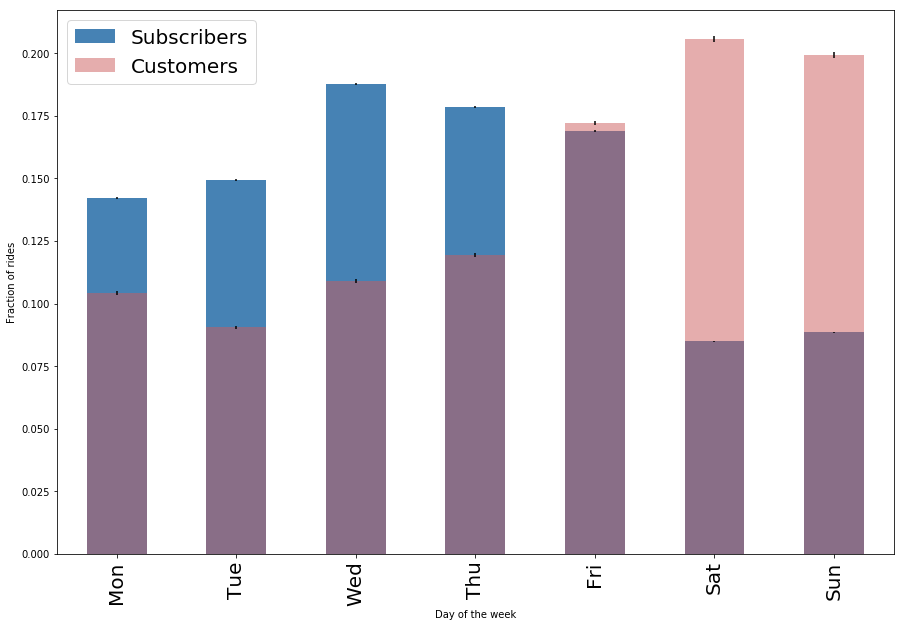

In [18]:
fig = pl.figure(figsize(15,10))

counts_s7 = df_07.date[df_07.usertype == 'Subscriber'].groupby([df_07.date.dt.weekday]).count()
norm_s7 = counts_s7.sum()
error_s7 = np.sqrt(counts_s7)
((counts_s7) / norm_s7).plot(kind="bar", color='SteelBlue',  
                           yerr=[((error_s7) / norm_s7, (error_s7) / norm_s7)], 
                           label='Subscirbers')

counts_c7 = df_07.date[df_07.usertype=='Customer'].groupby([df_07.date.dt.weekday]).count()
norm_c7 = counts_c7.sum()
error_c7=np.sqrt(counts_c7)
ax = ((counts_c7) / norm_c7).plot(kind="bar", alpha=0.5, 
                                yerr=[((error_c7) / norm_c7, (error_c7) / norm_c7)], 
                                color='IndianRed', label='Customer')

ax.xaxis.set_ticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], fontsize=20)
ax.set_ylabel ("Fraction of rides")
ax.set_xlabel ("Day of the week")

pl.legend(['Subscribers','Customers'],fontsize=20)



## Figure 4: Distribution of Citibike bikers by usertype in July 2015, normalized

Subscirbers: week:0.827, weekend:0.173, weekend error:0.001, weekend error:0.000
Customers: week:0.595, weekend:0.405, weekend error:0.002, weekend error:0.001


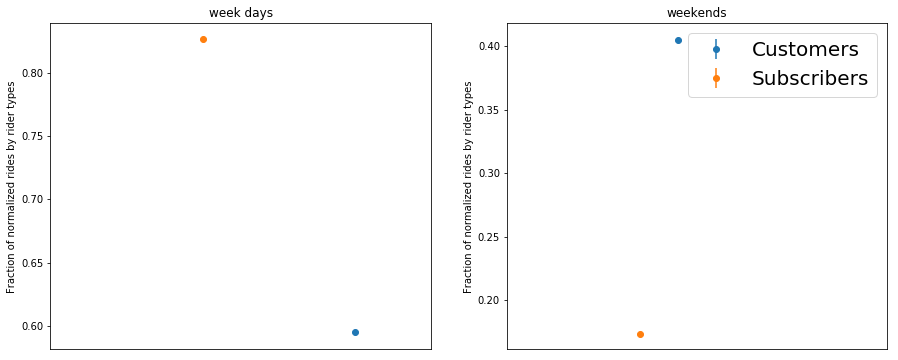

In [19]:
fig = pl.figure(figsize(15,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.set_xticks([])
ax2.set_xticks([])

week_s7 = sum(counts_s7[:-2]) * 1.0 / norm_s7  #fraction of subscirber riding on week days
weekend_s7 = sum(counts_s7[-2:]) * 1.0 / norm_s7  #fraction of subscriber riding on weekends
eweek_s7 = np.sqrt(sum(error_s7[:-2]**2)) / norm_s7  #error on fraction number of subscriber riding on week days
eweekend_s7 = np.sqrt(sum(error_s7[-2:]**2)) / norm_s7 #error on fraction number of subscriber riding on weekends

#same nomenclature as above
week_c7 = sum(counts_c7[:-2]) * 1.0 / norm_c7
weekend_c7 = sum(counts_c7[-2:]) * 1.0 / norm_c7
eweek_c7 = np.sqrt(sum(error_c7[:-2]**2)) / norm_c7
eweekend_c7 = np.sqrt(sum(error_c7[-2:]**2)) / norm_c7

print("Subscirbers: week:{0:.3f}, weekend:{1:.3f}, weekend error:{2:.3f}, weekend error:{3:.3f}"\
      .format(week_s7, weekend_s7, eweek_s7, eweekend_s7))
print("Customers: week:{0:.3f}, weekend:{1:.3f}, weekend error:{2:.3f}, weekend error:{3:.3f}"\
      .format(week_c7, weekend_c7, eweek_c7, eweekend_c7))

ax1.errorbar([0.4], [week_c7], yerr=[eweek_c7], fmt='o', label='Customers')
ax1.errorbar([0.2], [week_s7], yerr=[eweek_s7], fmt='o', label='Subscribers')
ax1.set_xlim(0, 0.5)
ax2.errorbar([0.4], [weekend_c7], yerr=[eweekend_c7], fmt='o', label='Customers')
ax2.errorbar([0.2], [weekend_s7], yerr=[eweekend_s7], fmt='o', label='Subscribers')
ax1.set_xlim(0, 0.5)
ax1.set_title("week days")
ax2.set_title("weekends")
ax2.set_ylabel("Fraction of normalized rides by rider types")
ax1.set_ylabel("Fraction of normalized rides by rider types")

pl.xlim(-0.5, 1.5)
pl.legend(fontsize = 20)

## Figure 5: Fraction of Citibike bikers per rider type in July 2015 for week days (left) and weekends (right)

In [20]:
P0mP1 = weekend_s7 - weekend_c7
print ("difference between subscriber and customer on weekend: ", P0mP1)
if P0mP1 > 0:
    # we are done...
    print("In accordance with Null Hypothesis")
else:
    # morework to do
    print ("We must check the significance before we reject the Null Hypothesis")

difference between subscriber and customer on weekend:  -0.231592457916
We must check the significance before we reject the Null Hypothesis


In [21]:
p = lambda p0, p1, n0, n1: (p0 * n0 + p1 * n1) / (n0 + n1)
se = lambda p, n0, n1: np.sqrt(p * (1 - p) * (1.0 / n0 + 1.0 / n1)) #standard error
zscore = lambda p0, p1, s : (p0 - p1) / s

# calculations

sp_stdev_sc7 = se(p(weekend_s7, weekend_c7, norm_s7, norm_c7), norm_s7, norm_c7)
# print (sp_stdev_mw)
z7 = zscore(weekend_s7, weekend_c7, sp_stdev_sc7)
print ("The z statistic is %.2f"%z7) 

The z statistic is -219.81


### The z statstic is even larger in the Summer! Larger z means farther into the significance reagion
### We reject the Null Hypothesis that man are more likely to commute than women $p <0.05$ in the summer aswell
## and my hypothesis is robust to seasonality
## BUT inreality ... there are many more riders in the summer,
## so the increase in statistical significance may not be due to a larger effect, but due to a larger size.
## Let's check the effect size:
## there are two formulas find in the literature
## $ r =\frac{z}{\sqrt{(n_0 + n_1)}}$
## and 
## $ h =2(arcsin\sqrt{p_0}-arcsin\sqrt{p_1})$  https://en.wikipedia.org/wiki/Cohen%27s_h

In [22]:
r = lambda z, n0, n1 : z / np.sqrt(n0+n0)
h = lambda p0, p1: 2 * (np.arcsin(np.sqrt(p0)) - np.arcsin(np.sqrt(p1)))

In [23]:
r02 = r(z, norm_s, norm_c)
r07 = r(z7, norm_s7, norm_c7)
print (r02, r07)

-0.0488153567453 -0.16335695343


## In this case r shows we have small effective size.

In [24]:
h02 = h(weekend_s, weekend_c)
h07 = h(weekend_s7, weekend_c7)
print (h02, h07)

-0.563257730558 -0.520659787069


## In this case, considering absolute value for h, we have medium effection size.